<a href="https://colab.research.google.com/github/PS-CSE/Deep-Learning-Projects/blob/main/Handwritten_digit_recognizer_%5BBy_Priyansh%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u>Handwritten digit recognizer</h1></u>

<b>At first we will import the Tenserflow library.<br>
Then from tenserflow ewe will import keras API.<br>
Then for better visualization we will import pyplot from matplotlib.<br>
Finally we will import numpy.</b>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<b>In the next cell we will import our dataset.<br>
Our data set is available on keras.<br>
Its name is mnist and we will load data by using load_data()
</b>
<hr>
<b> Our data is seperated in two parts one is the training set and other is the testing set.</b>
Here we have the following attributes:<br>
<b>X_train</b> --> Stores the training image dataset.<br>
<b>Y_train</b> --> Stores the resultant digit corresponding to each image dataset.<br>
<b>X_test</b> --> Stores the testing image dataset.<br>
<b>Y_test</b> --> Stores the resultant digit corresponding to each image dataset.<br>

In [ ]:
(X_train , Y_train),(X_test , Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Now we will get some insights about the size our data.

In [ ]:
print(f"Size of the Training data is : {len(X_train)}")
print(f"Size of the Testing data is : {len(X_test)}")

Size of the Training data is : 60000
Size of the Testing data is : 10000


So here we can see that the training dataset size is 60,000 and the size of testing dataset is 10,000 . So from here we can conclude that: <b>Training data consists of <u>85%</u> of the dataset , whereas this number is <u>15%</u> for testing dataset.</b>

In [ ]:
print(f"{X_train[0].shape} , {X_test[0].shape}")

(28, 28) , (28, 28)


So, in the above cell we can see that each image whether it be training or testing is a <b>28x28 grayscale image</b>. Now we will see the dataset. The image and its corresponding training digit result.

The first image in the dataset is : 


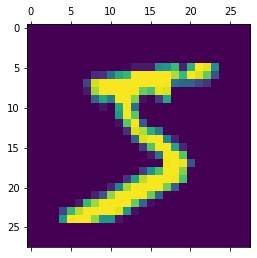

In [ ]:
print("The first image in the dataset is : ")
plt.matshow(X_train[0])

In [ ]:
print(f"The corresponding image's resultant digit is : {Y_train[0]}")

The corresponding image's resultant digit is : 5


Now we will arrange our dataset as follows...<br>
Here, each image has 28x28 share, we will <b>reshape it to a single array containing 28*28 (i.e. 784) elements</b>.<br>This process is called <b><u>flaterring</u></b> and it will make it easy for us to load our dataset int the neural network that we will create for this project.

In [ ]:
X_train_flatenned = X_train.reshape(len(X_train),28*28)
X_test_flatenned = X_test.reshape(len(X_test),28*28)
print(f"Now the shape of the training dataset for inputs is : \n Number of datasets = {X_train_flatenned.shape[0]}\n Shape of grayscale array for each image = {X_train_flatenned.shape[1]}")
print(f"Now the shape of the testing dataset for inputs is : \n Number of datasets = {X_test_flatenned.shape[0]}\n Shape of grayscale array for each image = {X_test_flatenned.shape[1]}")

Now the shape of the training dataset for inputs is : 
 Number of datasets = 60000
 Shape of grayscale array for each image = 784
Now the shape of the testing dataset for inputs is : 
 Number of datasets = 10000
 Shape of grayscale array for each image = 784


In [ ]:
train_mean = np.mean(X_train_flatenned[1])
print(train_mean)
test_mean = np.mean(X_test_flatenned[1])
print(test_mean)
X_train_flatenned = (X_train_flatenned - train_mean) /255
X_test_flatenned = (X_test_flatenned-test_mean)/255

39.661989795918366
36.798469387755105


<h3><b>Now we will create our neural network</b></h3>

In [ ]:
neural_network_improved = keras.Sequential([
    keras.layers.Dense(250,input_shape=(784,),activation="relu"),
    keras.layers.Dense(50,activation ="relu"),
    keras.layers.Dense(10,activation = "sigmoid")
])
neural_network_improved.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
neural_network_improved.fit(X_train_flatenned,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2214 - accuracy: 0.9339
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0946 - accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0677 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0530 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0419 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0339 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0290 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0251 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0231 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [ ]:
neural_network_improved.evaluate(X_test_flatenned,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9786


[0.08746731281280518, 0.978600025177002]

In [ ]:
y_predicted = neural_network_improved.predict(X_test_flatenned)
y_predicted_label = [np.argmax(i) for i in y_predicted]
confM = tf.math.confusion_matrix(labels = Y_test,predictions = y_predicted_label)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confM , annot = True , fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("True Value")

NameError: ignored